In [1]:
"""
souce: https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
Author: Eryk Lewinson
source2: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py
Topic1-2: Isolation Forest Example
source3: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py
Topic3: labeling contour

Goals
1. generate mixed (normal and outlier) data
2. visualize performance of IsolationForest in scatter plot
3. visualize the score map in contour label

"""

# importing libaries ---
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.tri as tri # for label the contour
from pylab import savefig 
from sklearn.ensemble import IsolationForest 

# import just in case
from sklearn import datasets

# Generating new, 'normal' observation 
rng = np.random.RandomState(42) # for repetitive result
n_normal=200
X_test00 = 0.2 * rng.randn(n_normal, 2) # array
X_test0 = np.r_[X_test00 + 3, X_test00] # array
X_test = pd.DataFrame(X_test0, columns = ['x1', 'x2'])

# Generating outliers 
n_outliers=200
X_outliers0 = rng.uniform(low=-1, high=5, size=(n_outliers, 2)) 
X_outliers = pd.DataFrame(X_outliers0,columns = ['x1', 'x2'])

# Generating normal + outline observation
X_mix0 = np.r_[X_test0,X_outliers0]
X_mix=pd.DataFrame(X_mix0,columns = ['x1', 'x2'])

clf = IsolationForest(max_samples=100, random_state=rng) 

# Generating normal + outline observation
X_mix0 = np.r_[X_test0,X_outliers0]
X_mix=pd.DataFrame(X_mix0,columns = ['x1', 'x2'])


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


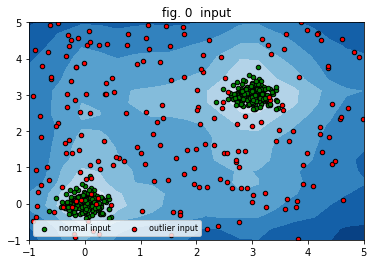

In [2]:
# 1st iteration fit
clf.fit(X_mix) 
Normality = clf.predict(X_mix) # Normality = 1 (normal), -1 (outlier)
i=Normality>0  
X_adjust1= X_mix0[i] # only count the normal data from the input

# contour plot
xx, yy = np.meshgrid(np.linspace(-1, 5, 20), np.linspace(-1, 5, 20))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z= clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# fig0: input (normal and outliers)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
## >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
##array([[1, 4],
##       [2, 5],
##       [3, 6]])

## >>> np.ravel() -> return 1-D array

# scatter plot
Xtest= plt.scatter(X_test0[:,0],X_test0[:,1],c='green',s=20,edgecolor='k')
Xoutliers=plt.scatter(X_outliers0[:,0],X_outliers0[:,1],c='red',
                s=20, edgecolor='k')

plt.title("fig. 0  input")
plt.legend((Xtest,Xoutliers),
           ('normal input','outlier input'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


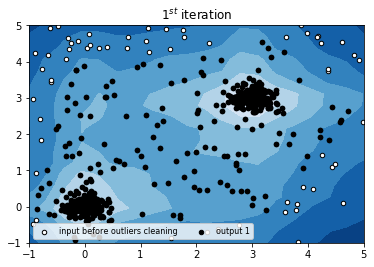

In [3]:
# 1st iteration fit
clf.fit(X_mix) 
Normality = clf.predict(X_mix) 
i=Normality>0  
X_adjust1= X_mix0[i] # only count the normal data from the input

# contour plot
xx, yy = np.meshgrid(np.linspace(-1, 5, 20), np.linspace(-1, 5, 20))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z= clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#fig1 1st iteration
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

Xmix= plt.scatter(X_mix0[:,0],X_mix0[:,1],c='white',s=20,edgecolor='k')
Xadjust1= plt.scatter(X_adjust1[:,0],X_adjust1[:,1],c='black',s=20)

plt.title("$1^{st}$ iteration")
plt.legend((Xmix,Xadjust1),
           ('input before outliers cleaning','output 1'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

#print("% choose normal:",  )
# use % pick outlier -> score = (# tot outlier-#pick outlier)/(# tot outlier)
#print("Normal Prediction Accuracy:", 
#      list(Normality).count(1)/Normality.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample




#### Next Step: create label for score contour
 [link](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py)


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


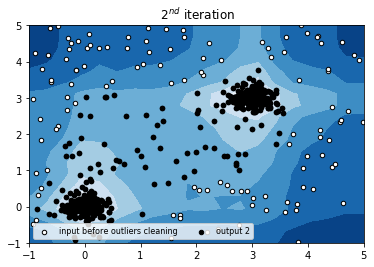

% choose normal:
Normal Prediction Accuracy: 0.9


In [4]:
# 2nd iteration fit
# change X_mix0 -> X_adjust1
clf.fit(pd.DataFrame(X_adjust1,columns = ['x1', 'x2'])) 
Normality = clf.predict(X_adjust1) # Normality = 1 (normal) -1 (outlier)
i=Normality>0  
X_adjust2= X_adjust1[i] # only count the normal data from the input

# contour plot
xx, yy = np.meshgrid(np.linspace(-1, 5, 20), np.linspace(-1, 5, 20))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z= clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#fig1 1st iteration
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

Xmix= plt.scatter(X_mix0[:,0],X_mix0[:,1],c='white',s=20,edgecolor='k')
Xadjust2= plt.scatter(X_adjust2[:,0],X_adjust2[:,1],c='black',s=20)

plt.title(" $2^{nd}$ iteration")
plt.legend((Xmix,Xadjust2),
           ('input before outliers cleaning','output 2'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

print("% choose normal:",  )
# use % pick outlier -> score = (# tot outlier-#pick outlier)/(# tot outlier)
print("Normal Prediction Accuracy:", 
      list(Normality).count(1)/Normality.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


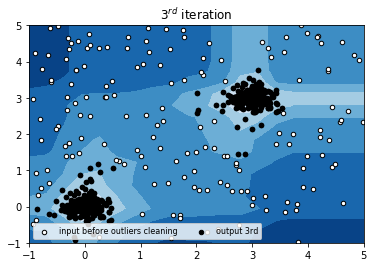

% choose normal:
Normal Prediction Accuracy: 0.8991769547325102


In [5]:
# 3rd iteration fit
# change X_madjust1-> X_adjust2, X_adjust2-> x_adjust3
clf.fit(pd.DataFrame(X_adjust2,columns = ['x1', 'x2'])) 
Normality = clf.predict(X_adjust2) # Normality = 1 (normal) -1 (outlier)
i=Normality>0  
X_adjust3= X_adjust2[i] # only count the normal data from the input

# contour plot
xx, yy = np.meshgrid(np.linspace(-1, 5, 20), np.linspace(-1, 5, 20))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z= clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#fig1 1st iteration
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

Xmix= plt.scatter(X_mix0[:,0],X_mix0[:,1],c='white',s=20,edgecolor='k')
Xadjust3= plt.scatter(X_adjust3[:,0],X_adjust3[:,1],c='black',s=20)

plt.title("$3^{rd}$ iteration")
plt.legend((Xmix,Xadjust3),
           ('input before outliers cleaning','output 3rd'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

print("% choose normal:",  )
# use % pick outlier -> score = (# tot outlier-#pick outlier)/(# tot outlier)
print("Normal Prediction Accuracy:", 
      list(Normality).count(1)/Normality.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample


/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/mailinux/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


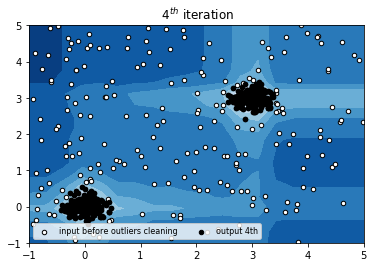

% choose normal:
Normal Prediction Accuracy: 0.8993135011441648


In [6]:
# 4th iteration fit
# change X_madjust2-> X_adjust3, X_adjust3-> x_adjust4
clf.fit(pd.DataFrame(X_adjust3,columns = ['x1', 'x2'])) 
Normality = clf.predict(X_adjust3) # Normality = 1 (normal) -1 (outlier)
i=Normality>0  
X_adjust4= X_adjust3[i] # only count the normal data from the input

# contour plot
xx, yy = np.meshgrid(np.linspace(-1, 5, 20), np.linspace(-1, 5, 20))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z= clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#fig1 1st iteration
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

Xmix= plt.scatter(X_mix0[:,0],X_mix0[:,1],c='white',s=20,edgecolor='k')
Xadjust4= plt.scatter(X_adjust4[:,0],X_adjust4[:,1],c='black',s=20)

plt.title(" $4^{th}$ iteration")
plt.legend((Xmix,Xadjust3),
           ('input before outliers cleaning','output 4th'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

print("% choose normal:",  )
# use % pick outlier -> score = (# tot outlier-#pick outlier)/(# tot outlier)
print("Normal Prediction Accuracy:", 
      list(Normality).count(1)/Normality.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample

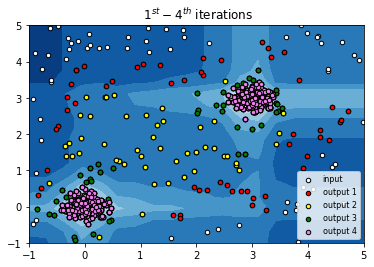

% choose normal:
Normal Prediction Accuracy: 0.8993135011441648


In [10]:
# plot for 1-4 iterations
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r) # most updated contour

Xmix= plt.scatter(X_mix0[:,0],X_mix0[:,1],c='white',s=20,edgecolor='k')
Xadjust1= plt.scatter(X_adjust1[:,0],X_adjust1[:,1],c='red',s=20,edgecolor='k')
Xadjust2= plt.scatter(X_adjust2[:,0],X_adjust2[:,1],c='yellow',s=20,edgecolor='k')
Xadjust3= plt.scatter(X_adjust3[:,0],X_adjust3[:,1],c='green',s=20,edgecolor='k')
Xadjust4= plt.scatter(X_adjust4[:,0],X_adjust4[:,1],c='violet',s=20,edgecolor='k')

plt.title(" $1^{st}-4^{th}$ iterations")
plt.legend((Xmix,Xadjust1,Xadjust2,Xadjust3,Xadjust4),
           ('input','output 1','output 2','output 3','output 4'),
           scatterpoints=1,
           loc='lower right',
           fontsize=8)
plt.xlim((-1, 5))
plt.ylim((-1, 5))
plt.show()

print("% choose normal:",  )
# use % pick outlier -> score = (# tot outlier-#pick outlier)/(# tot outlier)
print("Normal Prediction Accuracy:", 
      list(Normality).count(1)/Normality.shape[0]) 
## (y_pred_test).count(1) = number of prediction '1' normal
## y_pred_test.shape[0] = number of tot testing sample

